In [1]:
import pandas as pd

csv_file_path = "D:\\tweet_emotions.csv"
data = pd.read_csv(csv_file_path)
print(data.head())


     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [2]:
import pandas as pd

df = pd.read_csv('D:\\tweet_emotions.csv') 
# Displays the first few rows
print(df.head())

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...


In [3]:
import pandas as pd

df = pd.read_csv('tweet_emotions.csv')
print(df.head())
print(df.info())

     tweet_id   sentiment                                            content
0  1956967341       empty  @tiffanylue i know  i was listenin to bad habi...
1  1956967666     sadness  Layin n bed with a headache  ughhhh...waitin o...
2  1956967696     sadness                Funeral ceremony...gloomy friday...
3  1956967789  enthusiasm               wants to hang out with friends SOON!
4  1956968416     neutral  @dannycastillo We want to trade with someone w...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   tweet_id   40000 non-null  int64 
 1   sentiment  40000 non-null  object
 2   content    40000 non-null  object
dtypes: int64(1), object(2)
memory usage: 937.6+ KB
None


In [4]:
# Checks for missing values
print(df.isnull().sum())

# Droping duplicates
df = df.drop_duplicates()

tweet_id     0
sentiment    0
content      0
dtype: int64


Index(['tweet_id', 'sentiment', 'content'], dtype='object')


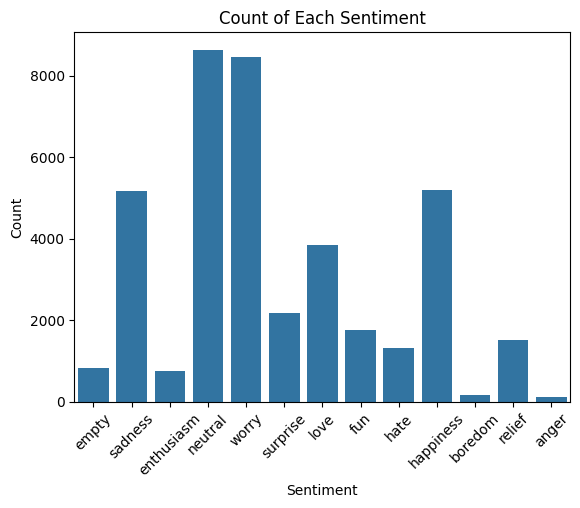

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('tweet_emotions.csv')

# Check the columns
print(df.columns)

# Example plot using the 'sentiment' column
sns.countplot(x='sentiment', data=df)
plt.title('Count of Each Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels
plt.show()

In [6]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import nltk
from nltk.corpus import stopwords

# Download stopwords (run this line once)
nltk.download('stopwords')

# Load the dataset
df = pd.read_csv('tweet_emotions.csv')

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Clean the text data
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove punctuation and numbers
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remove stop words
    return text

# Apply cleaning function to the content column
df['cleaned_content'] = df['content'].apply(clean_text)

# Encode the target variable
le = LabelEncoder()
df['encoded_sentiment'] = le.fit_transform(df['sentiment'])

# Feature extraction using TF-IDF
tfidf = TfidfVectorizer(max_features=5000)  # Adjust max_features as needed
X = tfidf.fit_transform(df['cleaned_content']).toarray()  # Features
y = df['encoded_sentiment']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Preprocessing complete. Data is ready for modeling.")


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shuba\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Missing values in each column:
 tweet_id     0
sentiment    0
content      0
dtype: int64
Preprocessing complete. Data is ready for modeling.


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        19
           1       1.00      0.00      0.00        31
           2       1.00      0.00      0.00       162
           3       1.00      0.00      0.00       163
           4       0.00      0.00      0.00       338
           5       0.33      0.27      0.30      1028
           6       0.00      0.00      0.00       268
           7       0.50      0.26      0.34       762
           8       0.31      0.56      0.40      1740
           9       1.00      0.00      0.00       352
          10       0.35      0.12      0.17      1046
          11       1.00      0.00      0.01       425
          12       0.29      0.57      0.39      1666

    accuracy                           0.32      8000
   macro avg       0.60      0.14      0.12      8000
weighted avg       0.41      0.32      0.26      8000



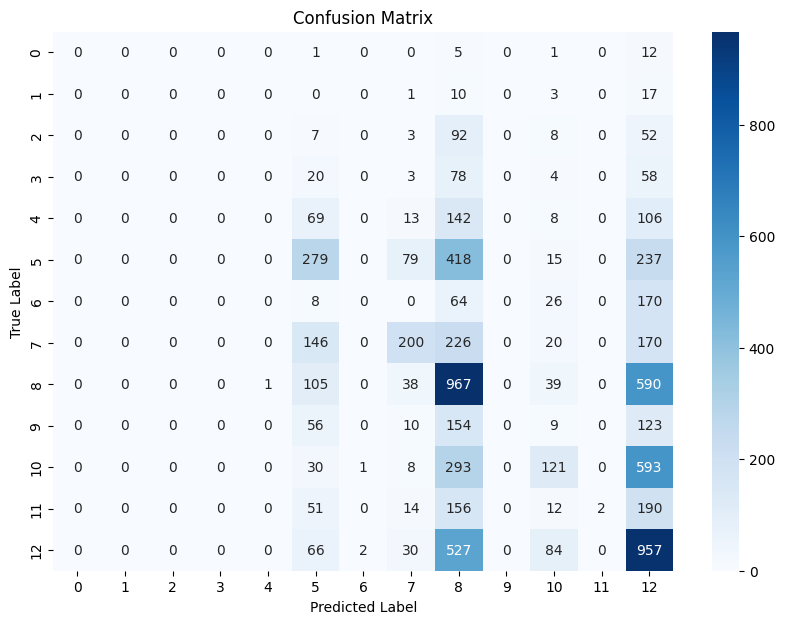

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize and train the Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model with zero_division handling
print("Classification Report:")
print(classification_report(y_test, y_pred, zero_division=1))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score

# Train model
model = MultinomialNB()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy Score
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy}")

# Cross-Validation (with sparse matrix)
cross_val_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy')
print("Cross-Validation Scores:", cross_val_scores)
print("Average Cross-Validation Score:", cross_val_scores.mean())
print("Average Cross-Validation Score:", cross_val_scores.mean())

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00       162
           3       0.00      0.00      0.00       163
           4       0.00      0.00      0.00       338
           5       0.37      0.27      0.31      1028
           6       0.67      0.01      0.01       268
           7       0.52      0.25      0.34       762
           8       0.30      0.55      0.39      1740
           9       0.00      0.00      0.00       352
          10       0.35      0.08      0.14      1046
          11       1.00      0.00      0.01       425
          12       0.29      0.60      0.39      1666

    accuracy                           0.31      8000
   macro avg       0.27      0.14      0.12      8000
weighted avg       0.34      0.31      0.26      8000

Accuracy Score: 0.314375


C:\Users\shuba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shuba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\shuba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

Cross-Validation Scores: [0.30974032 0.3073029  0.30892556]
Average Cross-Validation Score: 0.30865625841560723
Average Cross-Validation Score: 0.30865625841560723


In [23]:

import pandas as pd
import re
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import pickle

# Load and preprocess dataset
data = pd.read_csv('tweet_emotions.csv')
data = data.drop_duplicates()
data = data.dropna()

# Text preprocessing function
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower().strip()  # Convert to lowercase and strip whitespace
    return text

data['cleaned_text'] = data['content'].apply(preprocess_text)

# Encode labels
label_encoder = LabelEncoder()
data['sentiment_encoded'] = label_encoder.fit_transform(data['sentiment'])

# Vectorize text using TF-IDF
vectorizer = TfidfVectorizer(max_features=15000)
X = vectorizer.fit_transform(data['cleaned_text']).toarray()
y = data['sentiment_encoded']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Naive Bayes model
model = MultinomialNB()
model.fit(X_train, y_train)

# Save the trained model and vectorizer
with open('emotion_model.pkl', 'wb') as model_file:
    pickle.dump((model, vectorizer, label_encoder), model_file)

# Load model and vectorizer
with open('emotion_model.pkl', 'rb') as model_file:
    model, vectorizer, label_encoder = pickle.load(model_file)

# Accept user input and make predictions
user_input = input("Enter a sentence to predict its emotion: ")
cleaned_input = preprocess_text(user_input)
vectorized_input = vectorizer.transform([cleaned_input]).toarray()
predicted_emotion = label_encoder.inverse_transform(model.predict(vectorized_input))
print(f"Input Sentence: \"{user_input}\"")
print(f"The predicted emotion is: {predicted_emotion[0]}")


Input Sentence: "The meeting went as expected, nothing out of the ordinary."
The predicted emotion is: neutral
